In [3]:
#this is to plot inside the notebook
%matplotlib inline

# Let's start by importing the libraries you will be using in this assignment
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib

# A seed for the random number generator so all results are reproducible
np.random.seed(15)

# Makes our plots look nicer
matplotlib.style.use("seaborn-notebook")

# Let's also hide unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Assignment 1 Set 1: Learning Categories for Mammals and Birds

## A Perceptron for Mammals and Birds
This part of the assignment is designed to look at neural networks in the context of a more complicated classification problem, and to look at a data set related to human concepts and categories.


### Classifying animals

We are going to figure out whether a perceptron can learn to distinguish animals into two classes: mammals and birds. In the data folder, there should be 9 different files. 

Load the data into the notebook:

In [4]:
# import the data to train the network on
birds = np.genfromtxt(open('./data/birds.txt', "rb"), delimiter=",").T
mammals = np.genfromtxt(open('./data/mammals.txt', "rb"), delimiter=",").T

birds_tok = np.genfromtxt(open('./data/birds_tok.txt', "rb"),dtype='str', delimiter=",")
mammals_tok = np.genfromtxt(open('./data/mammals_tok.txt', "rb"),dtype='str', delimiter=",")

feats = np.genfromtxt(open('./data/feats.txt', "rb"),dtype='str', delimiter=",")

To train the perceptron, we will be using data from McRae et al. (2005). You may want to have a quick read through the paper before doing the assignment (see the materials on Learn).

To inspect the data you can use: 
    
`print(filename)` 

The **birds** and **mammals** matrices should have 20 rows and 16 columns. Each column in the matrix corresponds to a visual feature (e.g., has legs, flies) and each row to an animal (e.g., stork, pigeon). The features are 16 in total, and the animals are 20 per matrix (i.e., 20 birds and 20 mammals).


<div class="alert alert-info" role="alert">
<h1>Exercise 1)</h1>
<p>
Store the shapes of the birds and mammals files (2 Points).
</p>
</div>


In [5]:

birds_shape = birds.shape     
mammals_shape = mammals.shape



In [6]:
"""Check that *mammals* and *birds* matrices are the  correct shape"""
assert(birds_shape == mammals_shape)
assert(mammals_shape == (20,16))

The features are defined in the vector `feats`, the birds are defined in vector `birds_tok`, and the mammals in vector `mammals_tok`. 

The visual features were elicited from humans who were presented with a word (e.g., *tiger*) and asked to list its properties. The cells in the mammals and birds matrices correspond to the number of humans who listed a specific feature for each word. The counts are normalized so that each matrix row sums to one.

The goal is to train a perceptron that distinguishes between mammals and birds, by deciding whether a given input is a bird. In other words, the perceptron should output 1 in the case of a bird and 0 in the case of a mammal. You will need a matrix, input, containing all training examples, and a target vector, targets birds, whose entry i is 1 if example i is a bird, and 0 otherwise (use `np.zeros(n)` and `np.ones(n)`) for this.


<div class="alert alert-info" role="alert">
<h1>Exercise 2 a)</h1>
<p>
Generate the input (`X_train`) and output (`y_train`) arrays. Then create an array with all animal names (`tokens_train`) (1 Point).
</p>
</div>

- Use `np.concatenate((matrix1,matrix2))` to join both features for birds and mammals. For the output, use `np.concatenate((matrix1,matrix2))` again, combining `np.zeros(n)` and `np.ones(n))` to create the correct targets (*is it a bird?*). 

In [7]:
# create the training data matrix X_train and target vector y_train
X_train =  np.concatenate((birds,mammals))# concatenate birds and mammals
y_train =  np.concatenate((np.ones(len(birds)),np.zeros(len(mammals))))  # 1 if bird, 0 if mammals
tokens_train = np.concatenate((birds_tok,mammals_tok)) # concatenate animal names birds_tok and mammals_tok

In [8]:
# YOUR CODE HERE
print(feats)
print(X_train)
print(tokens_train)


['beh_-_eats' 'beh_-_eats_grass' 'beh_-_flies' 'has_4_legs' 'has_a_beak'
 'has_a_tail' 'has_feathers' 'has_fur' 'has_hooves' 'has_horns' 'has_legs'
 'has_wings' 'is_brown' 'is_fast' 'is_large' 'is_small']
[[0.         0.         0.06329114 0.         0.10126582 0.11392405
  0.27848101 0.         0.         0.         0.         0.
  0.         0.         0.07594937 0.        ]
 [0.         0.         0.         0.         0.15107914 0.
  0.         0.         0.         0.         0.         0.07194245
  0.         0.         0.         0.05035971]
 [0.09615385 0.         0.10897436 0.         0.13461538 0.
  0.05769231 0.         0.         0.         0.13461538 0.06410256
  0.         0.         0.05769231 0.        ]
 [0.04761905 0.         0.22857143 0.         0.1047619  0.
  0.14285714 0.         0.         0.         0.         0.17142857
  0.         0.         0.         0.        ]
 [0.19       0.         0.1        0.         0.06       0.
  0.11       0.         0.         

<div class="alert alert-info" role="alert">
<h1>Exercise 2 b)</h1>
<p>
Now create the perceptron, similar to how we created the MLP in assignment 1 part 0. Create a new perceptron and fit it to the data like we did in part 0 of this assignment (2 points).
</p>
</div>

- Store the perceptron in `perceptron`. 
- Store the predictions in a `predictions_perceptron` variable.
- Use all the default settings for the perceptron.
- Since we pass multiple (16) features our data is already in the correct shape. In contrast to part 0, you will not have to reshape the training data!

In [9]:
#import the perceptron model from scikit-learn
from sklearn.linear_model import Perceptron
# Create Perceptron 
perceptron = Perceptron()

# Fit network to the data  and 
# Make predictions on training data 
perceptron.fit(X_train,y_train)
predictions_perceptron =perceptron.predict(X_train)



<div class="alert alert-info" role="alert">
<h1>Exercise 2c)</h1>
<p>
Calculate the error of the perceptron on the training data using the mean_squared_error function imported in the cell below. 
(2 points)
</p>
</div>

- Store the error in `MSE_perceptron`.

In [10]:
# import mean squared error from scikit-learn
from sklearn.metrics import mean_squared_error
# calculate MSE here
MSE_perceptron = mean_squared_error(predictions_perceptron , y_train)
print(MSE_perceptron)


0.0


<div class="alert alert-info" role="alert">
<h1>Exercise 2 d)</h1>
<p>
What was the MSE? 
Did the model classify all examples correctly? Is this surprising? Briefly discuss the classification results. 
(5 points)
</p>
</div>

The MSE was zero hence the model classified all examples correctly.
The perceptron's job is to linearly divide the data.In fact,after having a look at the features each animal possesses,we can notice that there are a few features that can discriminate them easily.For example,no birds eat grass or have four legs and they tend to have beaks and feathers.
Since the inputs are in fact distributed with some pattern,the result is not as surprising as it first appeared to be.



# Comparing different models.

Now we'll be using a slightly more complicated neural network, resembling the one we saw in Tutorial 3. It has more units in its hidden layer, but otherwise it's very similar. It might be helpful to know that unlike our in-class example, the weights don't need to start at zero or another fixed value. 


<div class="alert alert-info" role="alert">
<h1>Exercise 3 a)</h1>
<p>
Fit the new network, `mlp` to the training data and assess whether it has learned the correct classification by making it predict the categories of the animals it's been trained on. Store the predictions in `predictions_mlp`.
</p>

<p>
Then calculate the MSE of the new network and examine its performance. Store the error in `MSE_mlp`.
</p>
(3 Points)
</div>

In [11]:
#Let's create the network - we use the logistic sigmoid function (logistic) as activation function
# and stochastic gradient descent ('sgd') to train the network
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='logistic', solver='sgd',
                         tol=0,learning_rate_init=.08, max_iter=200)

# fit network here
mlp.fit(X_train,y_train)

# predict categories of training data here
predictions_mlp = mlp.predict(X_train)


MSE_mlp = mean_squared_error(predictions_mlp , y_train)
print(MSE_mlp)


0.0


<div class="alert alert-info" role="alert">
<h1>Exercise 3 b)</h1>
<p>
Did the model learn the correct classification with the set parameters? Discuss (2-3 sentences). 
(2 points)
</p>
</div>   

Yes,as the MSE was also zero.
The mlp and perceptron have the similar basic mechanism and the mlp is even stronger at processing non-linear division so it probably can solve the problem.

<div class="alert alert-info" role="alert">
<h1>Exercise 3 c)</h1>
<p>
Now, recreate and re-fit the model ten times to the training data (`using mlp.fit` and `mlp.predict`), and compare the performances. To do this, store the MSE of each run in an array (2 points).
</p>
</div>   
- In each iteration you need to create a MLPClassifier and assign it to the `mlp` variable, exactly as above.
- Then fit and predict, exactly as above.
- Finally calculate the MSE and append it to the list `MSE_runs`.


In [21]:
MSE_runs = []  # create a list to store each result

for i in range(10):  # iterate 10 times
    mlp =  MLPClassifier(activation='logistic', solver='sgd',
                         tol=0,learning_rate_init=.08, max_iter=200)           
    mlp.fit(X_train, y_train)
    predictions_mlp =  mlp.predict(X_train)
    
    MSE = mean_squared_error(predictions_mlp , y_train)
    MSE_runs.append(MSE)
    # this stores the result of one run to the MSE_runs array 
print(MSE_runs)
    

[0.0, 0.15, 0.0, 0.0, 0.1, 0.5, 0.0, 0.2, 0.0, 0.0]


<div class="alert alert-info" role="alert">
<h1>Exercise 3 d)</h1>
<p>
Make a bar plot of all 10 MSEs (3 points).
</p>
</div>

Note that `plt.bar` needs two arrays: one for the indices, and one for the values. For example, to plot `[1,2,3,5,8]`:

    plt.bar(np.arange(5), [1,2,3,5,8]) 

Remember to add title and x- and y-labels.


Text(0.5,1,'MSEs in ten runs')

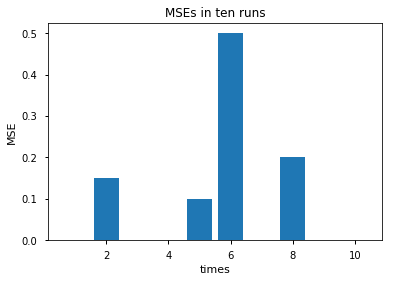

In [22]:
plt.bar(np.arange(10)+1,MSE_runs)
plt.xlabel("times")
plt.ylabel("MSE")
plt.title("MSEs in ten runs")

<div class="alert alert-info" role="alert">
<h1>Exercise 3 e)</h1>
<p>
Briefly discuss your results. Would you observe the same results with the perceptron?
(3 points)
</p>
</div>

The mlp's performance is highly unstable.There were only about half of the times the errors were zero and the errors varied a lot.This is probably because the starting weights were random and the way it fit was not that decisive and straightforward while the problem was clear.
The same results are not expected for the perceptron.We will probably see the perceptron do the job perfectly every time.

# Generalizing  to new data

Let us now see how well the models can generalize to unseen animals.

In [12]:
#import test data here
mammals_test = np.genfromtxt(open('./data/mammals_test.txt', "rb"), delimiter=",").T
mammals_tok_test = np.genfromtxt(open('./data/mammals_tok_test.txt', "rb"),dtype='str', delimiter=",")

birds_test = np.genfromtxt(open('./data/birds_test.txt', "rb"), delimiter=",").T
birds_tok_test = np.genfromtxt(open('./data/birds_tok_test.txt', "rb"),dtype='str', delimiter=",")

<div class="alert alert-info" role="alert">
<h1>Exercise 4 a)</h1>
<p>
  
Prepare the test data in the same way as we did for the training data. As before, you will need a matrix with all test examples (the input), and a target vector. Make sure that your use of zeros and ones matches mammals and birds in the same way that it did during the training phase! (2 points)
</p>
</div>

In [13]:
X_test = np.concatenate((mammals_test,birds_test))
y_test = np.concatenate((np.zeros(len(mammals_test)),np.ones(len(birds_test))))
tokens_test = np.concatenate((mammals_tok_test,birds_tok_test))

In [14]:
'''check shapes for test data '''
assert(X_test.shape == (30,16))

<div class="alert alert-info" role="alert">
<h1>Exercise 4 b)</h1>
<p>
Now test the perceptron we trained before **without re-training** it on the data (i.e. using `net.predict(X_test)`). 
    
This means that the network is now predicting the category of animals that it has not seen before.
(2 points)
</p>
</div>

- Store the predictions in `perceptron_test_predictions`.
- Store the MSE in `test_MSE_perceptron`.

In [15]:
perceptron_test_predictions = perceptron.predict(X_test)
test_MSE_perceptron  =  mean_squared_error(perceptron_test_predictions, y_test)
print (test_MSE_perceptron) 

0.1


<div class="alert alert-info" role="alert">
<h1>Exercise 4 c)</h1>
<p>
Discuss your results (1-2 sentences). (2 points)
</p>
</div>

The perceptron made a good prediction.The MSE was only 0.1.This is because it could focus more and noticed on the general pattern and the relationship between inputs,outputs.

## Inspecting model predictions.
Which animals did the neural network not classify correctly? 
<div class="alert alert-info" role="alert">
<h1>Exercise 4 d)</h1>
<p>
Complete the function below so that it prints the misclassified animals and the weight attributed to each feature. ( 2 points)
</p>
</div>

In [16]:
for index, true_label in enumerate(y_test):
    # if prediction does not match the true category
    if perceptron_test_predictions[index]!=true_label: 
        # print the name of the animal corresponding to the index
        print(tokens_test[index]) 
        # print the feature weights of the animal
        print (X_test[index])     
        # YOUR CODE HERE
print(feats)
print(perceptron.coef_)
      
        

dolphin
[0.10344828 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
platypus
[0.         0.         0.         0.         0.16666667 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
bat
[0.         0.         0.22352941 0.         0.         0.
 0.         0.12941176 0.         0.         0.         0.30588235
 0.         0.         0.         0.07058824]
['beh_-_eats' 'beh_-_eats_grass' 'beh_-_flies' 'has_4_legs' 'has_a_beak'
 'has_a_tail' 'has_feathers' 'has_fur' 'has_hooves' 'has_horns' 'has_legs'
 'has_wings' 'is_brown' 'is_fast' 'is_large' 'is_small']
[[ 0.02886248 -0.11827957  0.24719101 -0.27461641  0.29714655 -0.06741573
   0.57451212 -0.06741573 -0.07865169 -0.55       -0.2853691   0.3759046
  -0.07865169 -0.14606742 -0.16052632  0.05035971]]


<div class="alert alert-info" role="alert">
<h1>Exercise 4 e)</h1>
<p>
Can you find an explanation for the erroneous classifications?   
Discuss the animals that the model failed to classify correctly using the learned weights of the model and the features of the misclassified animals.
(5 points)
</p>
</div>
<ul> 
    <li>Looking at the weights that the network learned in conjunction with the McRae features (corresponding to the `feats` file) the weights operate on might help you answer the question. </li>
    <li>To get the weights of the perceptron use `perceptron.coef_`.</li>
    <li>Clearly relate your answers to the classification results!</li>
    </ul>

Dolphin is not similar to any animals we provided in the first training.In fact,all its feature are zero except the first one.Although the weight attributed to that was only 0.03,dolphin unfortunately failed to escape the wrong classification.

Platypus exceptionally has beaks like all the birds but not other mammals do,which was considered by the perceptron as a typical birds' feature so that it attributed a high weight of 0.30 to it.

Bat flies and has wings.Both of the features confused the perceptron as it considered them quite typical for birds and gave them high weights of 0.25 and 0.38 respectively.Although bat also have other features like has_fur or is small,either the number itself and the weight attributed to the feature is really small so they cannot change anything.

<div class="alert alert-info" role="alert">
<h1>Exercise 4 f)</h1>
<p>
Now, calculate the MLP (`mlp`) error on the test set. How does it compare to the single layer perceptron performance? Print out the misclassified animals (1 + 2 points).
</p>
</div>
- Calculate the predictions of the MLP and store them in `mlp_test_predictions`.
- Calculate the MSE on the test set and store it in `test_MSE_mlp`.
- Print out the misclassified animals


In [17]:
mlp_test_predictions = mlp.predict(X_test)
test_MSE_mlp =  mean_squared_error(mlp_test_predictions, y_test)
print(test_MSE_mlp)

0.7666666666666667


In [18]:
i=0
for index, true_label in enumerate(y_test):
    if mlp_test_predictions[index]!=true_label: # if prediction does not match the true category
        # here, print the name of the animal corresponding to the index
        print(tokens_test[index]) 
        i=i+1
        # below, print the feature weights of the animal corresponding to the index
        print (X_test[index])  
        # YOUR CODE HERE
        # YOUR CODE HERE
print(i)     

gorilla
[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.2875 0.    ]
beaver
[0.         0.         0.         0.         0.         0.27586207
 0.         0.         0.         0.         0.         0.
 0.2183908  0.         0.         0.        ]
chimp
[0.16071429 0.         0.         0.         0.         0.
 0.         0.16071429 0.         0.         0.         0.
 0.08928571 0.         0.         0.        ]
bear
[0.        0.        0.        0.0390625 0.        0.        0.
 0.15625   0.        0.        0.        0.        0.1015625 0.
 0.1796875 0.       ]
fox
[0.     0.     0.     0.125  0.     0.1    0.     0.175  0.     0.
 0.125  0.     0.     0.1375 0.     0.0875]
skunk
[0.         0.         0.         0.10526316 0.         0.09473684
 0.         0.09473684 0.         0.         0.11578947 0.
 0.         0.         0.         0.06315789]
raccoon
[0.     0.     0.     0.     0.     0.15   0.     0.     0.     0.
 0.     0

MLP failed to recognize most of the animals.

# Testing different parameters

<div class="alert alert-info" role="alert">
<h1>Exercise 5)</h1>
<p>
In this last section you need to evaluate how different parameter settings affect the classification of the MLP model. What is the averaged performance of the model for particular parameter settings?
    
Discuss your overall results and the effect of each parameter on the performance of the model. What is the best result you get on the training and test set, respectively? What were the corresponding parameter settings? 

You might want to have a look at Chapter 6 in "An Introduction to Neural Networks" (Gurney, 1997) for information.
(25 points)
</p>
</div>

For all your experiments you will be required to:
- Clearly document your parameter settings and results. Please don't just run several models and then summarize in text. You need to provide code for all your experiments.
- Run 10 `fit` calls for each parametrization you try and report **averaged** model performance.
- Clearly summarize your results and provide visual aids whenever possible. You should provide plots for MSE together with error bars (have a look at the `yerr` parameter for `plt.bar()`.



**To make sure that your solutions get marked correctly please:**
- Put all your code that runs the MLP for different parameters in the first cell.
- Then put all the plotting to visualize your results in the next free cell.
- Finally, discuss your results in the last cell.

(25 points)


## Hints:
Some of the things you might want to try include:
- Changing the learning rate: e.g. `1, 0.1,0.01,0.001`. 
- What is the effect of the number of hidden layers and units? 
- Iterations: change the max number of iterations. E.g. `20,100,500,1000, 5000`

Put all simulations in the cell below:

In [19]:
"""
# different learning rates
MSE_average1=[]
deviation1=[]
test_MSE1=[]
for j in range(4):#learning rate:1 0.1 0.01  0.001 
        MSE_runs = []  
        for i in range(10):               # iterate 10 times
            mlp =  MLPClassifier(activation='logistic', solver='sgd',
                         tol=0,learning_rate_init=10**(-j), max_iter=200)           
            mlp.fit(X_train, y_train)
            predictions_mlp =  mlp.predict(X_train)
            MSE = mean_squared_error(predictions_mlp , y_train)
            MSE_runs.append(MSE)
        test_MSE1.append(mean_squared_error(mlp.predict(X_test), y_test))    
        deviation1.append(np.std(MSE_runs))
        MSE_average1.append(np.mean(MSE_runs))

MSE_average2=[]
deviation2=[]
test_MSE2=[]
morerates=[0.01,0.025,0.05,0.075,0.1,0.25,0.5,0.75,0.1]
moreratess=['0.01','0.025','0.05','0.075','0.1','0.25','0.5','0.75','0.1']
for j in morerates:#learning rate:1 0.1 0.01  0.001 
        MSE_runs = []  
        for i in range(10):               # iterate 10 times
            mlp =  MLPClassifier(activation='logistic', solver='sgd',
                         tol=0,learning_rate_init=j, max_iter=200)           
            mlp.fit(X_train, y_train)
            predictions_mlp =  mlp.predict(X_train)
            MSE = mean_squared_error(predictions_mlp , y_train)
            MSE_runs.append(MSE)
        test_MSE2.append(mean_squared_error(mlp.predict(X_test), y_test))    
        deviation2.append(np.std(MSE_runs))
        MSE_average2.append(np.mean(MSE_runs))


# different max iterations
MSE_average3=[]
deviation3=[]
test_MSE3=[]
for j in [20,100,500,1000, 5000]:
        MSE_runs = []  
        for i in range(10):               # iterate 10 times
            mlp =  MLPClassifier(activation='logistic', solver='sgd',
                         tol=0,learning_rate_init=.1, max_iter=j)           
            mlp.fit(X_train, y_train)
            predictions_mlp =  mlp.predict(X_train)
            MSE = mean_squared_error(predictions_mlp , y_train)
            MSE_runs.append(MSE)
        test_MSE3.append(mean_squared_error(mlp.predict(X_test), y_test))    
        deviation3.append(np.std(MSE_runs))
        MSE_average3.append(np.mean(MSE_runs))

MSE_average4=[]
deviation4=[]
test_MSE4=[]
for j in [20,40,60,80,100]:
        MSE_runs = []  
        for i in range(10):              
            mlp =  MLPClassifier(activation='logistic', solver='sgd',
                         tol=0,learning_rate_init=.1, max_iter=j)           
            mlp.fit(X_train, y_train)
            predictions_mlp =  mlp.predict(X_train)
            MSE = mean_squared_error(predictions_mlp , y_train)
            MSE_runs.append(MSE)
        test_MSE4.append(mean_squared_error(mlp.predict(X_test), y_test))    
        deviation4.append(np.std(MSE_runs))
        MSE_average4.append(np.mean(MSE_runs))


#different numbers of hidden units
MSE_average5=[]
deviation5=[]
test_MSE5=[]
for j in [10,20,50,100,200,500]:
        MSE_runs = []  
        for i in range(10):               # iterate 10 times
            mlp =  MLPClassifier(activation='logistic', solver='sgd',
                         tol=0,learning_rate_init=.1, max_iter=200,hidden_layer_sizes=(j,))           
            mlp.fit(X_train, y_train)
            predictions_mlp =  mlp.predict(X_train)
            MSE = mean_squared_error(predictions_mlp , y_train)
            MSE_runs.append(MSE)
        test_MSE5.append(mean_squared_error(mlp.predict(X_test), y_test))    
        deviation5.append(np.std(MSE_runs))
        MSE_average5.append(np.mean(MSE_runs))

MSE_average6=[]
deviation6=[]
test_MSE6=[]
for j in [1,5,15,50,100,200,300,400,500]:
        MSE_runs = []  
        for i in range(10):               # iterate 10 times
            mlp =  MLPClassifier(activation='logistic', solver='sgd',
                         tol=0,learning_rate_init=.1, max_iter=200,hidden_layer_sizes=(j,))           
            mlp.fit(X_train, y_train)
            predictions_mlp =  mlp.predict(X_train)
            MSE = mean_squared_error(predictions_mlp , y_train)
            MSE_runs.append(MSE)
        test_MSE6.append(mean_squared_error(mlp.predict(X_test), y_test))    
        deviation6.append(np.std(MSE_runs))
        MSE_average6.append(np.mean(MSE_runs))

#different numbers of hidden layers
MSE_average7=[]
deviation7=[]
test_MSE7=[]
 
for i in range(10):      
            MSE_runs = [] 
            mlp =  MLPClassifier(activation='logistic', solver='sgd',
                         tol=0,learning_rate_init=.1, max_iter=200,hidden_layer_sizes=(100,))           
            mlp.fit(X_train, y_train)
            predictions_mlp =  mlp.predict(X_train)
            MSE = mean_squared_error(predictions_mlp , y_train)
            MSE_runs.append(MSE)
test_MSE7.append(mean_squared_error(mlp.predict(X_test), y_test))    
deviation7.append(np.std(MSE_runs))
MSE_average7.append(np.mean(MSE_runs))

for i in range(10):       
            MSE_runs = [] # iterate 10 times
            mlp =  MLPClassifier(activation='logistic', solver='sgd',
                         tol=0,learning_rate_init=.1, max_iter=200,hidden_layer_sizes=(100,100,))           
            mlp.fit(X_train, y_train)
            predictions_mlp =  mlp.predict(X_train)
            MSE = mean_squared_error(predictions_mlp , y_train)
            MSE_runs.append(MSE)
test_MSE7.append(mean_squared_error(mlp.predict(X_test), y_test))    
deviation7.append(np.std(MSE_runs))
MSE_average7.append(np.mean(MSE_runs))

for i in range(10):    
            MSE_runs = [] # iterate 10 times
            mlp =  MLPClassifier(activation='logistic', solver='sgd',
                         tol=0,learning_rate_init=.1, max_iter=200,hidden_layer_sizes=(100,100,100,))           
            mlp.fit(X_train, y_train)
            predictions_mlp =  mlp.predict(X_train)
            MSE = mean_squared_error(predictions_mlp , y_train)
            MSE_runs.append(MSE)
test_MSE7.append(mean_squared_error(mlp.predict(X_test), y_test))    
deviation7.append(np.std(MSE_runs))
MSE_average7.append(np.mean(MSE_runs))


#different activation functions
MSE_average=[]
deviation=[]
test_MSE=[]
for j in ['identity', 'logistic', 'tanh', 'relu']:
        MSE_runs = []  
        for i in range(10):               # iterate 10 times
            mlp =  MLPClassifier(activation=j, solver='sgd',
                         tol=0,learning_rate_init=.1, max_iter=200)           
            mlp.fit(X_train, y_train)
            predictions_mlp =  mlp.predict(X_train)
            MSE = mean_squared_error(predictions_mlp , y_train)
            MSE_runs.append(MSE)
        test_MSE.append(mean_squared_error(mlp.predict(X_test), y_test))    
        deviation.append(np.std(MSE_runs))
        MSE_average.append(np.mean(MSE_runs))
        


Generate all plots in the cell below:

Text(0.5,1,'diffrent activation functions')

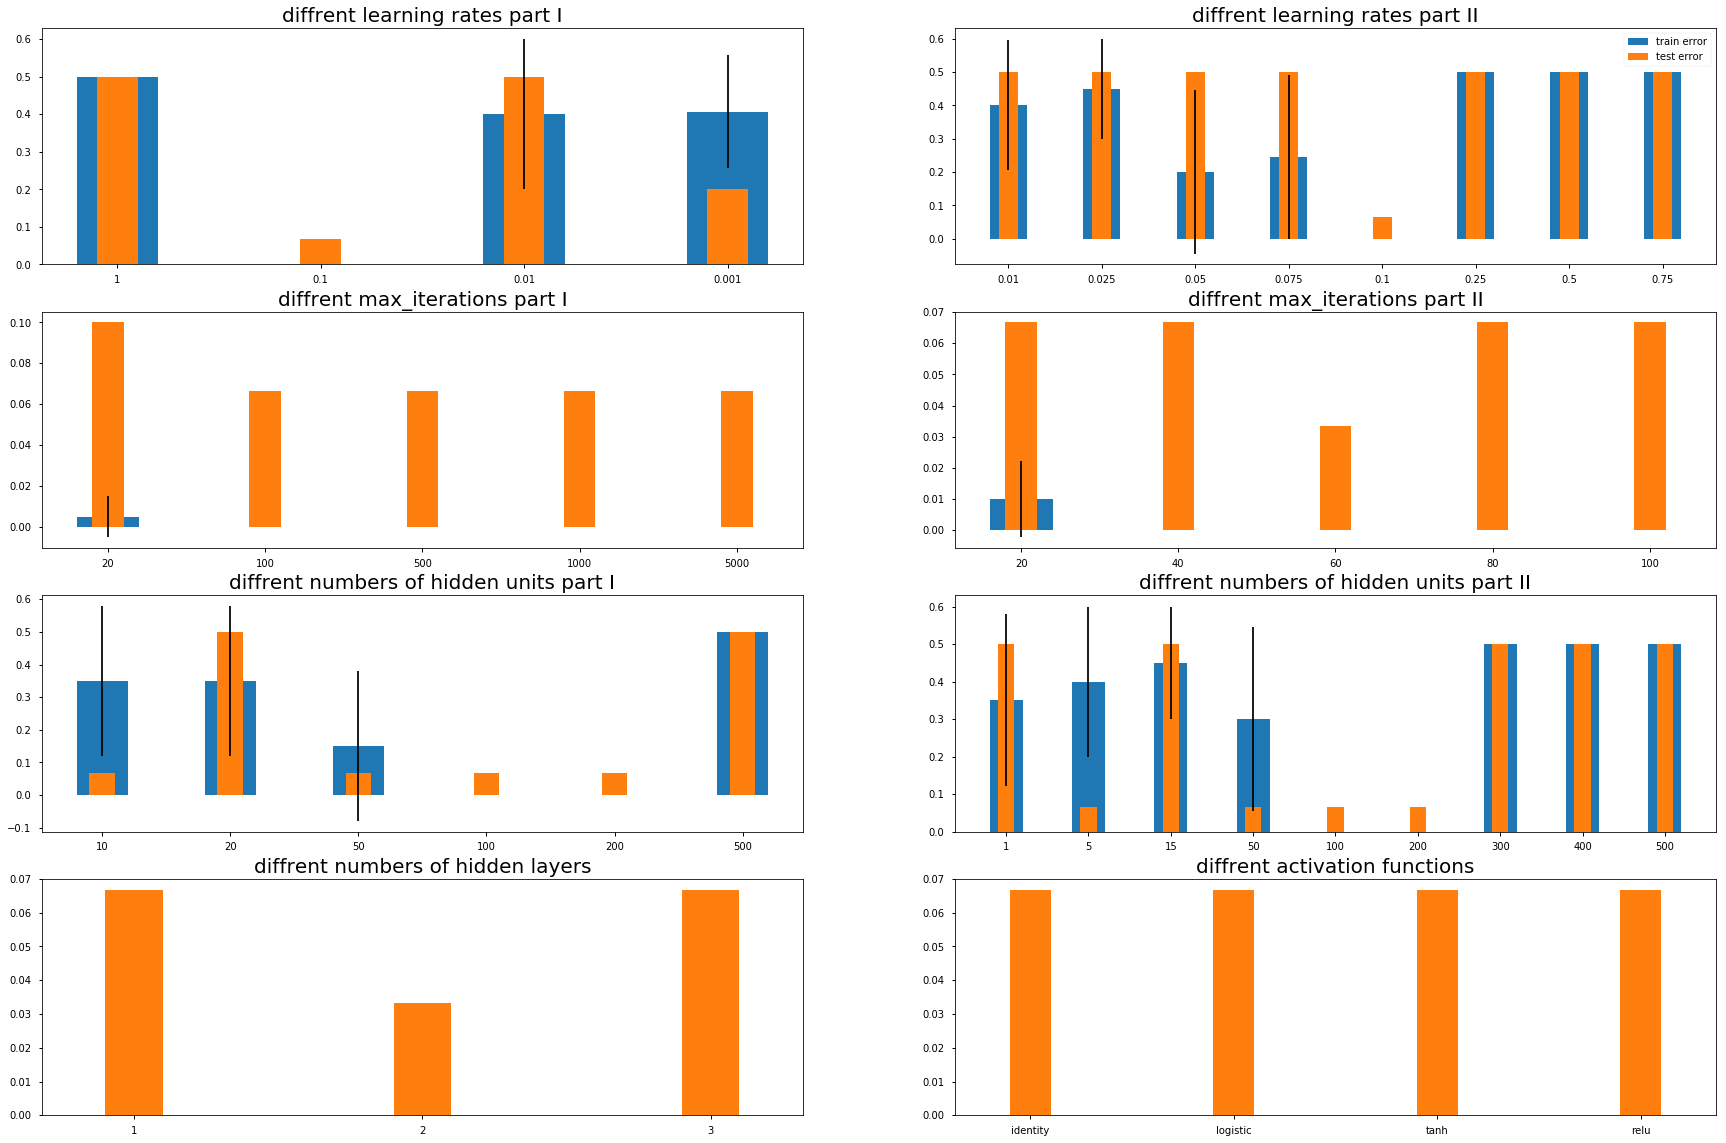

In [20]:
"""
# YOUR CODE HERE
plt.figure(figsize=(30,20))
plt.subplot(421)
p1=plt.bar(['1','0.1','0.01','0.001'],MSE_average1,yerr=deviation1,width=0.4)
p2=plt.bar(['1','0.1','0.01','0.001'],test_MSE1,width=0.2)
plt.title('diffrent learning rates part I',fontsize=20)

plt.subplot(422)
p1=plt.bar(moreratess,MSE_average2,yerr=deviation2,width=0.4,label='train error')
p2=plt.bar(moreratess,test_MSE2,width=0.2,label='test error')
plt.title('diffrent learning rates part II',fontsize=20)
plt.legend( loc='upper right')

plt.subplot(423)
p1=plt.bar(['20','100','500','1000','5000'],MSE_average3,yerr=deviation3,width=0.4)
p2=plt.bar(['20','100','500','1000','5000'],test_MSE3,width=0.2)
plt.title('diffrent max_iterations part I',fontsize=20)

plt.subplot(424)
p1=plt.bar(['20','40','60','80','100'],MSE_average4,yerr=deviation4,width=0.4)
p2=plt.bar(['20','40','60','80','100'],test_MSE4,width=0.2)
plt.title('diffrent max_iterations part II',fontsize=20)

plt.subplot(425)
p1=plt.bar(['10','20','50','100','200','500'],MSE_average5,yerr=deviation5,width=0.4)
p2=plt.bar(['10','20','50','100','200','500'],test_MSE5,width=0.2)
plt.title('diffrent numbers of hidden units part I',fontsize=20)

plt.subplot(426)
p1=plt.bar(['1','5','15','50','100','200','300','400','500'],MSE_average6,yerr=deviation6,width=0.4)
p2=plt.bar(['1','5','15','50','100','200','300','400','500'],test_MSE6,width=0.2)
plt.title('diffrent numbers of hidden units part II',fontsize=20)

plt.subplot(427)
p1=plt.bar(['1','2','3'],MSE_average7,yerr=deviation7,width=0.4)
p2=plt.bar(['1','2','3'],test_MSE7,width=0.2)
plt.title('diffrent numbers of hidden layers',fontsize=20)

plt.subplot(428)
p1=plt.bar(['identity', 'logistic', 'tanh', 'relu'],MSE_average,yerr=deviation,width=0.4)
p2=plt.bar(['identity', 'logistic', 'tanh', 'relu'],test_MSE,width=0.2)
plt.title('diffrent activation functions',fontsize=20)


     



"""

Discuss your results in the cell below:

We controlled the mlp's parameters as activation='logistic', solver='sgd',tol=0,learning_rate_init=.1, max_iter=200,hidden_layer_sizes=(100,) and changed them respectively.

1.For the learning rate,when it was around 0.1 the preformance here was the best where the training error equaled to 0 and test error was less than 0.1.If the learning rate is too small,the mlp is likely to be stuck in a local minimum.Also because the learning progress is small, the performance is very unstable(see the error bars in the first two plots),much depending on the random weights it is assigned in the beginning.While when the learning rate is too big(larger than 0.25 in this case),the test and the training error both keep at 0.5,which is the exact outcome to get if you assign each animal 1/0 randomly,indicating the learning is unsuccessful because you change weights too aggresively and the mlp fails to find the optimal point.

2.For the max iterations,there were no big differences after the number reached 20.The training error soon disappered and the test error dropped to and remained around 0.07.One more interesting finding was when the number is approximately 60 the test error was a little bit lower.The outcome can be interpreted as after certain number of iterations,the solution has almost converged.A small number that is slightly bigger than the previous one(60 here) may help refine the deciding function.But more iterations only wastes time.

3.For the number of hidden units when the mlp had one single hidden layer,the training performed perfectly (no errors at all)when it was between 100 and 300 while a marginaly broader range of units numbers could make sure the test error was below 0.1.However,if there were too many hidden units(over 300 in this case),the mlp was given so much freedom to fit the inputs that the freedom increased variations unrelated to the input-output relations and made the training overfitted and test process worse.Conversly,if the number was small,the data would be underfitted so no ideal way was found to avoid all the training errors and the error was in a wide variety due to the randomness.The testing error had a minimum betweer 1-15.

4.For the number of hidden layers,the training error was always zero and the testing error weres all below 0.07 with a small difference.Since the problem we tried to solve here was not very complicated,and even quite linearly despite some special cases,more hidden layers were unnecessary.

5.As from the last plot,we can tell that choices of different activation functions didn't make a difference here probably because the problem here was not complex enough.
